In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import sys
import matplotlib.font_manager as fm
%matplotlib inline

In [13]:
# colums 인덱스 정의
data_columns = ['스케쥴 id','터미널 코드','Call Year','선박 코드','Call No','접안 일시','출발 일시','선적 작업 수량','양하 작업 수량','Shft 작업 수량','정보 수집 일시']

In [14]:
# CSV파일 불러오기
terminal_schedule_2017=pd.DataFrame(pd.read_csv('C:/Users/ujh32/OneDrive/바탕 화면/data/terminal_schedule_2017.csv',header=None,encoding='utf-8'))
terminal_schedule_2018=pd.DataFrame(pd.read_csv('C:/Users/ujh32/OneDrive/바탕 화면/data/terminal_schedule_2018.csv',header=None,encoding='utf-8'))
terminal_schedule_2019=pd.DataFrame(pd.read_csv('C:/Users/ujh32/OneDrive/바탕 화면/data/terminal_schedule_2019.csv',header=None,encoding='utf-8'))
terminal_schedule_2020=pd.DataFrame(pd.read_csv('C:/Users/ujh32/OneDrive/바탕 화면/data/terminal_schedule_2020.csv',header=None,encoding='utf-8'))
terminal_schedule_2017.columns=data_columns
terminal_schedule_2018.columns=data_columns
terminal_schedule_2019.columns=data_columns
terminal_schedule_2020.columns=data_columns

A:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
A:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [15]:
# 2017~2020년 데이터 합치기
terminal_schedule = pd.concat([terminal_schedule_2017,terminal_schedule_2018,terminal_schedule_2019,terminal_schedule_2020])
terminal_schedule = terminal_schedule.reset_index()
terminal_schedule.drop('index',axis=1,inplace=True)
print(terminal_schedule)
print(terminal_schedule.dtypes)

          스케쥴 id 터미널 코드  Call Year 선박 코드 Call No         접안 일시         출발 일시  \
0              1   BNCT       2017  CMPG     004  2.017071e+13  2.017071e+13   
1              2   BNCT       2017  CARC     003  2.017071e+13  2.017071e+13   
2              3   BNCT       2017  IABM     019  2.017071e+13  2.017071e+13   
3              4   BNCT       2017  TXTR     015  2.017071e+13  2.017071e+13   
4              5   BNCT       2017  CXFZ     002  2.017071e+13  2.017071e+13   
...          ...    ...        ...   ...     ...           ...           ...   
1047759  1663231   BPTC       2020  NSTA      30  2.020112e+13  2.020112e+13   
1047760  1663232   BPTC       2020  JPPC      47  2.020112e+13  2.020112e+13   
1047761  1663233   BPTC       2020  NSSK      31  2.020112e+13  2.020112e+13   
1047762  1663234   BPTC       2020  NSSO       6  2.020121e+13  2.020121e+13   
1047763  1663235   BPTC       2020  NSSU      16  2.020121e+13  2.020121e+13   

         선적 작업 수량  양하 작업 수량  Shft 작업 수량

In [16]:
# str과 float로 된 날짜 형식을 datetime으로 바꾸기

# float 형식을 str 형식으로 변환
terminal_schedule[['접안 일시','출발 일시']] = terminal_schedule[['접안 일시','출발 일시']].astype(str)
terminal_schedule['접안 일시'] = terminal_schedule['접안 일시'].str.slice(start=0,stop=14)
terminal_schedule['출발 일시'] = terminal_schedule['출발 일시'].str.slice(start=0,stop=14)

# str 형식을 datetime 형식으로 바꾸기 위한 전처리
terminal_schedule['접안 일시'] = terminal_schedule['접안 일시'].str[0:4]+'-'+terminal_schedule['접안 일시'].str[4:6]+'-'+terminal_schedule['접안 일시'].str[6:8] +' '+terminal_schedule['접안 일시'].str[8:10]+':'+terminal_schedule['접안 일시'].str[10:12]+':'+terminal_schedule['접안 일시'].str[12:14]
terminal_schedule['출발 일시'] = terminal_schedule['출발 일시'].str[0:4]+'-'+terminal_schedule['출발 일시'].str[4:6]+'-'+terminal_schedule['출발 일시'].str[6:8] +' '+terminal_schedule['출발 일시'].str[8:10]+':'+terminal_schedule['출발 일시'].str[10:12]+':'+terminal_schedule['출발 일시'].str[12:14]

# 날짜 형식이 안맞는 값 제거
terminal_schedule = terminal_schedule[terminal_schedule['접안 일시'].str.len() == 19]
terminal_schedule = terminal_schedule[terminal_schedule['출발 일시'].str.len() == 19]

# str 형식을 datetime으로 변환
terminal_schedule['접안 일시']=pd.to_datetime(terminal_schedule['접안 일시'])
terminal_schedule['출발 일시']=pd.to_datetime(terminal_schedule['출발 일시'])
terminal_schedule['정보 수집 일시']=pd.to_datetime(terminal_schedule['정보 수집 일시'])
print(terminal_schedule)
print(terminal_schedule.dtypes)

          스케쥴 id 터미널 코드  Call Year 선박 코드 Call No               접안 일시  \
0              1   BNCT       2017  CMPG     004 2017-07-09 08:48:00   
1              2   BNCT       2017  CARC     003 2017-07-10 02:42:00   
2              3   BNCT       2017  IABM     019 2017-07-10 13:50:00   
3              4   BNCT       2017  TXTR     015 2017-07-10 16:10:00   
4              5   BNCT       2017  CXFZ     002 2017-07-11 06:30:00   
...          ...    ...        ...   ...     ...                 ...   
1047759  1663231   BPTC       2020  NSTA      30 2020-11-21 03:00:00   
1047760  1663232   BPTC       2020  JPPC      47 2020-11-21 05:00:00   
1047761  1663233   BPTC       2020  NSSK      31 2020-11-23 14:00:00   
1047762  1663234   BPTC       2020  NSSO       6 2020-12-07 06:00:00   
1047763  1663235   BPTC       2020  NSSU      16 2020-12-08 06:00:00   

                      출발 일시  선적 작업 수량  양하 작업 수량  Shft 작업 수량  \
0       2017-07-10 00:25:00     872.0     958.0        40.0   
1       2

In [6]:
#1_1 어떤 선박의 예상 입항 일시가 주어졌을 때 해당 선박의 실제 입항 일시

# 부산지역 외 다른 항구들은 제외
terminal_schedule_1_1 = terminal_schedule
terminal_schedule_1_1 = terminal_schedule_1_1.drop(terminal_schedule_1_1[(terminal_schedule_1_1['터미널 코드'] =='GWCT')|
                                                                         (terminal_schedule_1_1['터미널 코드'] =='SMGT')|
                                                                         (terminal_schedule_1_1['터미널 코드'] =='KITL')|
                                                                         (terminal_schedule_1_1['터미널 코드'] =='ICT')|
                                                                         (terminal_schedule_1_1['터미널 코드'] =='E1CT')|
                                                                         (terminal_schedule_1_1['터미널 코드'] =='HJIT')|                                                                         (terminal_schedule_1_1['터미널 코드'] =='SNCT')&
                                                                         (terminal_schedule_1_1['터미널 코드'] =='IGCT')|
                                                                         (terminal_schedule_1_1['터미널 코드'] =='JUCT')|
                                                                         (terminal_schedule_1_1['터미널 코드'] =='PTCT')].index)
terminal_schedule_1_1

,스케쥴 id,터미널 코드,Call Year,선박 코드,Call No,접안 일시,출발 일시,선적 작업 수량,양하 작업 수량,Shft 작업 수량,정보 수집 일시
0,1,BNCT,2017,CMPG,004,2017-07-09 08:48:00,2017-07-10 00:25:00,872.0,958.0,40.0,NaT
1,2,BNCT,2017,CARC,003,2017-07-10 02:42:00,2017-07-10 17:50:00,947.0,285.0,12.0,NaT
2,3,BNCT,2017,IABM,019,2017-07-10 13:50:00,2017-07-10 21:50:00,23.0,191.0,0.0,NaT
3,4,BNCT,2017,TXTR,015,2017-07-10 16:10:00,2017-07-11 11:05:00,247.0,196.0,0.0,NaT
4,5,BNCT,2017,CXFZ,002,2017-07-11 06:30:00,2017-07-11 20:00:00,732.0,0.0,0.0,NaT
...,...,...,...,...,...,...,...,...,...,...,...
1047759,1436379,PCTC,2020,PLSB,220,2020-06-16 11:00:00,2020-06-16 13:00:00,NaN,NaN,NaN,2020-06-15 07:25:00
1047760,1437872,PCTC,2020,PLSB,221,2020-06-17 14:00:00,2020-06-17 14:30:00,NaN,NaN,NaN,2020-06-16 06:25:00
1047761,1444828,PCTC,2020,PLSB,221,2020-06-22 08:30:00,2020-06-22 12:00:00,NaN,NaN,NaN,2020-06-21 11:25:00
1047762,1448012,PCTC,2020,PLSB,222,2020-06-24 08:30:00,2020-06-24 10:30:00,NaN,NaN,NaN,2020-06-23 06:46:00


In [7]:
# 1_2 해당 선박의 작업 시간은 얼마나 걸릴지 예상하시오

# 선적 작업 수량과 양하 작업 수량을 바탕으로 추측
# 마지막 정보 수집 일시를 정답이라 가정 

# Shft 작업 수량 행 삭제
terminal_schedule_1_2 = terminal_schedule
terminal_schedule_1_2.drop('Shft 작업 수량',axis=1,inplace=True)
print(terminal_schedule_1_2)

          스케쥴 id 터미널 코드  Call Year 선박 코드 Call No               접안 일시  \
0              1   BNCT       2017  CMPG     004 2017-07-09 08:48:00   
1              2   BNCT       2017  CARC     003 2017-07-10 02:42:00   
2              3   BNCT       2017  IABM     019 2017-07-10 13:50:00   
3              4   BNCT       2017  TXTR     015 2017-07-10 16:10:00   
4              5   BNCT       2017  CXFZ     002 2017-07-11 06:30:00   
...          ...    ...        ...   ...     ...                 ...   
1047759  1436379   PCTC       2020  PLSB     220 2020-06-16 11:00:00   
1047760  1437872   PCTC       2020  PLSB     221 2020-06-17 14:00:00   
1047761  1444828   PCTC       2020  PLSB     221 2020-06-22 08:30:00   
1047762  1448012   PCTC       2020  PLSB     222 2020-06-24 08:30:00   
1047763  1450633   PCTC       2020  PLSB     223 2020-06-26 14:00:00   

                      출발 일시  선적 작업 수량  양하 작업 수량            정보 수집 일시  
0       2017-07-10 00:25:00     872.0     958.0                 N

In [8]:
# 결측치 확인
print(terminal_schedule.isnull().sum())

스케쥴 id            0
터미널 코드            0
Call Year         0
선박 코드             0
Call No           0
접안 일시             0
출발 일시             0
선적 작업 수량      20435
양하 작업 수량      20435
정보 수집 일시     499561
dtype: int64


In [9]:
# 결측치 제거
terminal_schedule_1_2 = terminal_schedule_1_2.dropna()
print(terminal_schedule_1_2.isnull().sum())
print(terminal_schedule_1_2)

스케쥴 id       0
터미널 코드       0
Call Year    0
선박 코드        0
Call No      0
접안 일시        0
출발 일시        0
선적 작업 수량     0
양하 작업 수량     0
정보 수집 일시     0
dtype: int64
          스케쥴 id 터미널 코드  Call Year 선박 코드 Call No               접안 일시  \
447374    980651    PNC       2018  PROT     001 2019-08-07 11:00:00   
512113    822884   BNCT       2019  CABC     001 2019-03-27 07:00:00   
512114    822885   BNCT       2019  CMEI     001 2019-03-28 01:00:00   
512115    822886   BNCT       2019  AWI4     005 2019-03-28 14:00:00   
512116    822887   BNCT       2019  AKN4     005 2019-04-01 14:00:00   
...          ...    ...        ...   ...     ...                 ...   
1045007  1271656   BPTC       2020  NBHS     600 2020-02-22 18:00:00   
1045008  1272388   BPTC       2020  NBHS     600 2020-02-22 20:00:00   
1045009  1261956   BPTC       2020  NLBS     601 2020-02-14 17:00:00   
1045010  1261991   BPTC       2020  NLBS     601 2020-02-14 17:00:00   
1045011  1283762    BIT       2020  PCBJ     

In [19]:
# 작업 수량이 0이나 -인 행 제거
terminal_schedule_1_2.drop(terminal_schedule_1_2.loc[terminal_schedule_1_2['선적 작업 수량']<=0].index, inplace=True)
terminal_schedule_1_2.drop(terminal_schedule_1_2.loc[terminal_schedule_1_2['양하 작업 수량']<=0].index, inplace=True)

# 출발 일시가 접안 일시보다 빠른경우 제거 (데이터 오류)
terminal_schedule_1_2.drop(terminal_schedule_1_2[terminal_schedule_1_2['출발 일시'] >= terminal_schedule_1_2['정보 수집 일시']].index, inplace=True)
terminal_schedule_1_2

,스케쥴 id,터미널 코드,Call Year,선박 코드,Call No,접안 일시,출발 일시,선적 작업 수량,양하 작업 수량,정보 수집 일시
512594,823853,HPNT,2019,HCSO,010,2019-03-26 05:12:00,2019-03-26 21:00:00,359.0,346.0,2019-03-26 22:48:21
512827,824096,IGCT,2019,COTW,012,2019-03-26 14:18:00,2019-03-26 23:27:00,128.0,181.0,2019-03-27 01:22:07
513175,824698,PNC,2019,EMTL,002,2019-03-26 00:00:00,2019-03-26 19:45:00,588.0,1089.0,2019-03-27 07:53:48
513200,824724,PNC,2019,EMTL,002,2019-03-26 00:00:00,2019-03-26 19:45:00,586.0,1087.0,2019-03-27 08:22:13
513228,824754,HJIT,2019,KSCL,013,2019-03-26 07:30:00,2019-03-26 19:30:00,401.0,529.0,2019-03-27 09:18:22
...,...,...,...,...,...,...,...,...,...,...
1043695,1627905,HJIT,2020,ACHK,100,2020-10-19 19:00:00,2020-10-19 23:40:00,79.0,228.0,2020-10-20 00:14:00
1043799,1596281,BPTC,2020,HPUS,102,2020-09-19 21:00:00,2020-09-20 07:00:00,120.0,88.0,2020-09-21 00:19:00
1044287,1596099,SNCT,2020,HSIC,112,2020-09-19 14:06:00,2020-09-20 18:00:00,196.0,204.0,2020-09-21 00:19:00
1044308,1628011,BPTC,2020,HPUS,112,2020-10-18 13:55:00,2020-10-18 22:40:00,125.0,87.0,2020-10-20 00:14:00


In [18]:
# 중복 항해 제거 및 최종값(정답) 표출
terminal_schedule_1_2.drop_duplicates(['터미널 코드','Call Year','선박 코드','Call No'],keep="last")

,스케쥴 id,터미널 코드,Call Year,선박 코드,Call No,접안 일시,출발 일시,선적 작업 수량,양하 작업 수량,정보 수집 일시
512594,823853,HPNT,2019,HCSO,010,2019-03-26 05:12:00,2019-03-26 21:00:00,359.0,346.0,2019-03-26 22:48:21
512827,824096,IGCT,2019,COTW,012,2019-03-26 14:18:00,2019-03-26 23:27:00,128.0,181.0,2019-03-27 01:22:07
513200,824724,PNC,2019,EMTL,002,2019-03-26 00:00:00,2019-03-26 19:45:00,586.0,1087.0,2019-03-27 08:22:13
513228,824754,HJIT,2019,KSCL,013,2019-03-26 07:30:00,2019-03-26 19:30:00,401.0,529.0,2019-03-27 09:18:22
513272,824805,HKTL,2019,DJHN,33,2019-03-27 07:00:00,2019-03-27 10:00:00,11.0,51.0,2019-03-27 10:19:01
...,...,...,...,...,...,...,...,...,...,...
1043695,1627905,HJIT,2020,ACHK,100,2020-10-19 19:00:00,2020-10-19 23:40:00,79.0,228.0,2020-10-20 00:14:00
1043799,1596281,BPTC,2020,HPUS,102,2020-09-19 21:00:00,2020-09-20 07:00:00,120.0,88.0,2020-09-21 00:19:00
1044287,1596099,SNCT,2020,HSIC,112,2020-09-19 14:06:00,2020-09-20 18:00:00,196.0,204.0,2020-09-21 00:19:00
1044308,1628011,BPTC,2020,HPUS,112,2020-10-18 13:55:00,2020-10-18 22:40:00,125.0,87.0,2020-10-20 00:14:00


In [1]:
# 출발 시간의 참값을 알아내기 위해 우선 정보 수집 일시가 출발 일시 이전일 시 데이터 제거
terminal_schedule_1_2.drop(terminal_schedule_1_2.loc[terminal_schedule_1_2['출발 일시'] <= terminal_schedule_1_2['접안 일시']].index, inplace=True)
terminal_schedule_1_2

NameError: name 'terminal_schedule_1_2' is not defined

In [29]:
# 걸린시간 열 추가
terminal_schedule_1_2['작업 소요 시간'] = terminal_schedule_1_2['출발 일시'] - terminal_schedule_1_2['접안 일시']
terminal_schedule_1_2['작업 소요 시간(초)'] = terminal_schedule_1_2['작업 소요 시간'].dt.seconds + terminal_schedule_1_2['작업 소요 시간'].dt.days*86400
terminal_schedule_1_2['총 작업량'] = terminal_schedule_1_2['선적 작업 수량'] + terminal_schedule_1_2['양하 작업 수량']
terminal_schedule_1_2['작업량 대비 소요 시간'] = terminal_schedule_1_2['작업 소요 시간(초)'] / terminal_schedule_1_2['양하 작업 수량']
terminal_schedule_1_2

# 맨 밑에 이상한놈이 보이네요 헐

<ipython-input-29-ea0455a6001c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terminal_schedule_1_2['작업 소요 시간'] = terminal_schedule_1_2['출발 일시'] - terminal_schedule_1_2['접안 일시']
<ipython-input-29-ea0455a6001c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terminal_schedule_1_2['작업 소요 시간(초)'] = terminal_schedule_1_2['작업 소요 시간'].dt.seconds + terminal_schedule_1_2['작업 소요 시간'].dt.days*86400
<ipython-input-29-ea0455a6001c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,스케쥴 id,터미널 코드,Call Year,선박 코드,Call No,접안 일시,출발 일시,선적 작업 수량,양하 작업 수량,정보 수집 일시,작업 소요 시간,작업 소요 시간(초),총 작업량,작업량 대비 소요 시간
512594,823853,HPNT,2019,HCSO,010,2019-03-26 05:12:00,2019-03-26 21:00:00,359.0,346.0,2019-03-26 22:48:21,0 days 15:48:00,56880,705.0,164.393064
512827,824096,IGCT,2019,COTW,012,2019-03-26 14:18:00,2019-03-26 23:27:00,128.0,181.0,2019-03-27 01:22:07,0 days 09:09:00,32940,309.0,181.988950
513175,824698,PNC,2019,EMTL,002,2019-03-26 00:00:00,2019-03-26 19:45:00,588.0,1089.0,2019-03-27 07:53:48,0 days 19:45:00,71100,1677.0,65.289256
513200,824724,PNC,2019,EMTL,002,2019-03-26 00:00:00,2019-03-26 19:45:00,586.0,1087.0,2019-03-27 08:22:13,0 days 19:45:00,71100,1673.0,65.409384
513228,824754,HJIT,2019,KSCL,013,2019-03-26 07:30:00,2019-03-26 19:30:00,401.0,529.0,2019-03-27 09:18:22,0 days 12:00:00,43200,930.0,81.663516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043695,1627905,HJIT,2020,ACHK,100,2020-10-19 19:00:00,2020-10-19 23:40:00,79.0,228.0,2020-10-20 00:14:00,0 days 04:40:00,16800,307.0,73.684211
1043799,1596281,BPTC,2020,HPUS,102,2020-09-19 21:00:00,2020-09-20 07:00:00,120.0,88.0,2020-09-21 00:19:00,0 days 10:00:00,36000,208.0,409.090909
1044287,1596099,SNCT,2020,HSIC,112,2020-09-19 14:06:00,2020-09-20 18:00:00,196.0,204.0,2020-09-21 00:19:00,1 days 03:54:00,100440,400.0,492.352941
1044308,1628011,BPTC,2020,HPUS,112,2020-10-18 13:55:00,2020-10-18 22:40:00,125.0,87.0,2020-10-20 00:14:00,0 days 08:45:00,31500,212.0,362.068966


In [30]:
from sklearn import linear_model
import numpy as np
import matplotlib
import statsmodels.api as sm
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
matplotlib.style.use('ggplot')

In [31]:
# statsmodels module이 안깔려있으면 설치!
!pip install statsmodels

512594      705.0
512827      309.0
513175     1677.0
513200     1673.0
513228      930.0
            ...  
1043695     307.0
1043799     208.0
1044287     400.0
1044308     212.0
1044664     419.0
Length: 2031, dtype: float64
512594      56880
512827      32940
513175      71100
513200      71100
513228      43200
            ...  
1043695     16800
1043799     36000
1044287    100440
1044308     31500
1044664    100800
Name: 작업 소요 시간, Length: 2031, dtype: int64


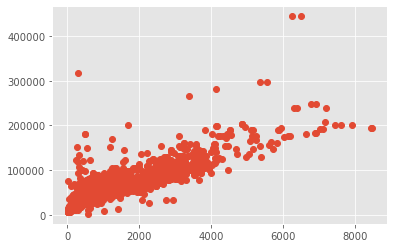

In [32]:
# 총 작업 수량에 따른 작업 소요 시간을 산점도로 나타내어 이상치 확인
data = terminal_schedule_1_2[['선적 작업 수량','양하 작업 수량','작업 소요 시간']]
X = data['선적 작업 수량']+data['양하 작업 수량']
Y = data['작업 소요 시간'].dt.seconds + data['작업 소요 시간'].dt.days*86400
print(X)
print(Y)
plt.plot(X,Y,linestyle='none',marker='o')
plt.show()

In [33]:
# 작업량 대비 작업 소요 시간에서 IQR을 측정해 이상치 제거

quartile_1 = terminal_schedule_1_2['작업량 대비 소요 시간'].quantile(0.25)
quartile_3 = terminal_schedule_1_2['작업량 대비 소요 시간'].quantile(0.75)
IQR = quartile_3 - quartile_1
filter_df = terminal_schedule_1_2[(terminal_schedule_1_2['작업량 대비 소요 시간'] < (quartile_1 - 1.5 * IQR)) | (terminal_schedule_1_2['작업량 대비 소요 시간'] > (quartile_3 + 1.5 * IQR))]
terminal_schedule_1_2 = terminal_schedule_1_2.drop(filter_df.index)
print(terminal_schedule_1_2)

          스케쥴 id 터미널 코드  Call Year 선박 코드 Call No               접안 일시  \
512594    823853   HPNT       2019  HCSO     010 2019-03-26 05:12:00   
512827    824096   IGCT       2019  COTW     012 2019-03-26 14:18:00   
513175    824698    PNC       2019  EMTL     002 2019-03-26 00:00:00   
513200    824724    PNC       2019  EMTL     002 2019-03-26 00:00:00   
513228    824754   HJIT       2019  KSCL     013 2019-03-26 07:30:00   
...          ...    ...        ...   ...     ...                 ...   
1043436  1618462   HJIT       2020  ACHK      95 2020-10-07 13:10:00   
1043636  1626788   HJIT       2020  ACHK      99 2020-10-16 14:10:00   
1043695  1627905   HJIT       2020  ACHK     100 2020-10-19 19:00:00   
1043799  1596281   BPTC       2020  HPUS     102 2020-09-19 21:00:00   
1044308  1628011   BPTC       2020  HPUS     112 2020-10-18 13:55:00   

                      출발 일시  선적 작업 수량  양하 작업 수량            정보 수집 일시 작업 소요 시간  \
512594  2019-03-26 21:00:00     359.0     346.0 2019-03

512594      705.0
512827      309.0
513175     1677.0
513200     1673.0
513228      930.0
            ...  
1043436     255.0
1043636     289.0
1043695     307.0
1043799     208.0
1044308     212.0
Length: 1817, dtype: float64
512594     56880
512827     32940
513175     71100
513200     71100
513228     43200
           ...  
1043436    16800
1043636    24600
1043695    16800
1043799    36000
1044308    31500
Name: 작업 소요 시간, Length: 1817, dtype: int64


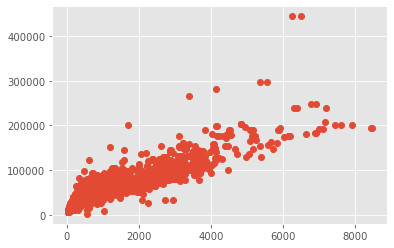

In [34]:
# 총 작업 수량에 따른 작업 소요 시간을 산점도로 나타내어 이상치 확인
data = terminal_schedule_1_2[['선적 작업 수량','양하 작업 수량','작업 소요 시간']]
X = data['선적 작업 수량']+data['양하 작업 수량']
Y = data['작업 소요 시간'].dt.seconds + data['작업 소요 시간'].dt.days*86400
print(X)
print(Y)
plt.plot(X,Y,linestyle='none',marker='o')
plt.show()

In [35]:
# 추가적으로 데이터 선별

terminal_schedule_1_2.drop(terminal_schedule_1_2[terminal_schedule_1_2['작업 소요 시간(초)'] >= (terminal_schedule_1_2['총 작업량']*35 + 100000)].index, inplace=True)
terminal_schedule_1_2

,스케쥴 id,터미널 코드,Call Year,선박 코드,Call No,접안 일시,출발 일시,선적 작업 수량,양하 작업 수량,정보 수집 일시,작업 소요 시간,작업 소요 시간(초),총 작업량,작업량 대비 소요 시간
512594,823853,HPNT,2019,HCSO,010,2019-03-26 05:12:00,2019-03-26 21:00:00,359.0,346.0,2019-03-26 22:48:21,15:48:00,56880,705.0,164.393064
512827,824096,IGCT,2019,COTW,012,2019-03-26 14:18:00,2019-03-26 23:27:00,128.0,181.0,2019-03-27 01:22:07,09:09:00,32940,309.0,181.988950
513175,824698,PNC,2019,EMTL,002,2019-03-26 00:00:00,2019-03-26 19:45:00,588.0,1089.0,2019-03-27 07:53:48,19:45:00,71100,1677.0,65.289256
513200,824724,PNC,2019,EMTL,002,2019-03-26 00:00:00,2019-03-26 19:45:00,586.0,1087.0,2019-03-27 08:22:13,19:45:00,71100,1673.0,65.409384
513228,824754,HJIT,2019,KSCL,013,2019-03-26 07:30:00,2019-03-26 19:30:00,401.0,529.0,2019-03-27 09:18:22,12:00:00,43200,930.0,81.663516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043436,1618462,HJIT,2020,ACHK,95,2020-10-07 13:10:00,2020-10-07 17:50:00,192.0,63.0,2020-10-09 23:25:00,04:40:00,16800,255.0,266.666667
1043636,1626788,HJIT,2020,ACHK,99,2020-10-16 14:10:00,2020-10-16 21:00:00,172.0,117.0,2020-10-16 21:25:00,06:50:00,24600,289.0,210.256410
1043695,1627905,HJIT,2020,ACHK,100,2020-10-19 19:00:00,2020-10-19 23:40:00,79.0,228.0,2020-10-20 00:14:00,04:40:00,16800,307.0,73.684211
1043799,1596281,BPTC,2020,HPUS,102,2020-09-19 21:00:00,2020-09-20 07:00:00,120.0,88.0,2020-09-21 00:19:00,10:00:00,36000,208.0,409.090909


512594      705.0
512827      309.0
513175     1677.0
513200     1673.0
513228      930.0
            ...  
1043436     255.0
1043636     289.0
1043695     307.0
1043799     208.0
1044308     212.0
Length: 1808, dtype: float64
512594     56880
512827     32940
513175     71100
513200     71100
513228     43200
           ...  
1043436    16800
1043636    24600
1043695    16800
1043799    36000
1044308    31500
Name: 작업 소요 시간, Length: 1808, dtype: int64


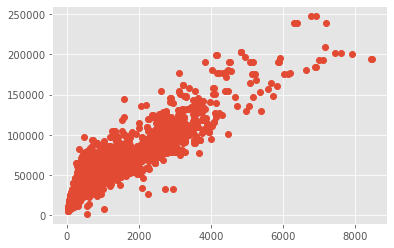

In [36]:
# 총 작업 수량에 따른 작업 소요 시간을 산점도로 나타내어 이상치 확인
data = terminal_schedule_1_2[['선적 작업 수량','양하 작업 수량','작업 소요 시간']]
X = data['선적 작업 수량']+data['양하 작업 수량']
Y = data['작업 소요 시간'].dt.seconds + data['작업 소요 시간'].dt.days*86400
print(X)
print(Y)
plt.plot(X,Y,linestyle='none',marker='o')
plt.show()

In [37]:
# 파라미터간 상관관계 분석 및 시각화
data = terminal_schedule_1_2[['선적 작업 수량','양하 작업 수량','작업 소요 시간(초)']]
corr = data.corr()
corr

,선적 작업 수량,양하 작업 수량,작업 소요 시간(초)
선적 작업 수량,1.000000,0.582322,0.818312
양하 작업 수량,0.582322,1.000000,0.803407
작업 소요 시간(초),0.818312,0.803407,1.000000


A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51089 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-

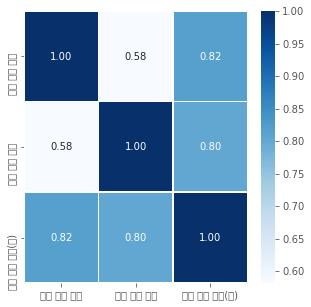

In [38]:
plt.figure(figsize=(5, 5))
sns.heatmap(data=data.corr(), annot=True,fmt='.2f', linewidths=.5, cmap='Blues')
plt.rcParams['font.family'] = 'NanumGothic'
# 둘다 비슷하게 상관있다!

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


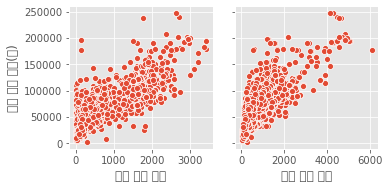

In [39]:
# 분포도 분석
sns.pairplot(data, x_vars=['선적 작업 수량','양하 작업 수량'],y_vars=['작업 소요 시간(초)'])

In [40]:
# 다중선형회귀 분석

data = terminal_schedule_1_2[['선적 작업 수량','양하 작업 수량','작업 소요 시간(초)']]
X = data[['선적 작업 수량','양하 작업 수량']]
y = data['작업 소요 시간(초)']
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y= y)
prediction = linear_regression.predict(X = pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

a value =  25296.93180901641
b value =  [29.66596017 24.95032103]


In [41]:
residuals = y-prediction
residuals.describe()

count    1.808000e+03
mean     5.593795e-12
std      1.622755e+04
min     -7.500130e+04
25%     -1.067201e+04
50%     -2.214871e+03
75%      9.708699e+03
max      7.702062e+04
Name: 작업 소요 시간(초), dtype: float64

In [42]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.8313144128581764


In [43]:
from sklearn.metrics import mean_squared_error
print('score = ', linear_regression.score(X =pd.DataFrame(X), y=y))
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

score =  0.8313144128581764
Mean_Squared_Error =  263187785.9549926
RMSE =  16223.063396134301


In [44]:
# statsmodels를 활용한 다중선형회귀분석 정확도 79%
data = terminal_schedule_1_2[['선적 작업 수량','양하 작업 수량','작업 소요 시간']]
X = data[['선적 작업 수량','양하 작업 수량']]
y = data['작업 소요 시간'].dt.seconds + data['작업 소요 시간'].dt.days*86400
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               작업 소요 시간   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     4448.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:51:07   Log-Likelihood:                -20093.
No. Observations:                1808   AIC:                         4.019e+04
Df Residuals:                    1805   BIC:                         4.021e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.53e+04    550.514     45.951      0.0

In [45]:
data = terminal_schedule_1_2[['선적 작업 수량','양하 작업 수량','작업 소요 시간']]
X = data[['선적 작업 수량','양하 작업 수량']]
y = data['작업 소요 시간'].dt.seconds + data['작업 소요 시간'].dt.days*86400
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle=True)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1627, 2)
X_test shape: (181, 2)
y_train shape: (1627,)
y_test shape: (181,)


0.8451344628983358


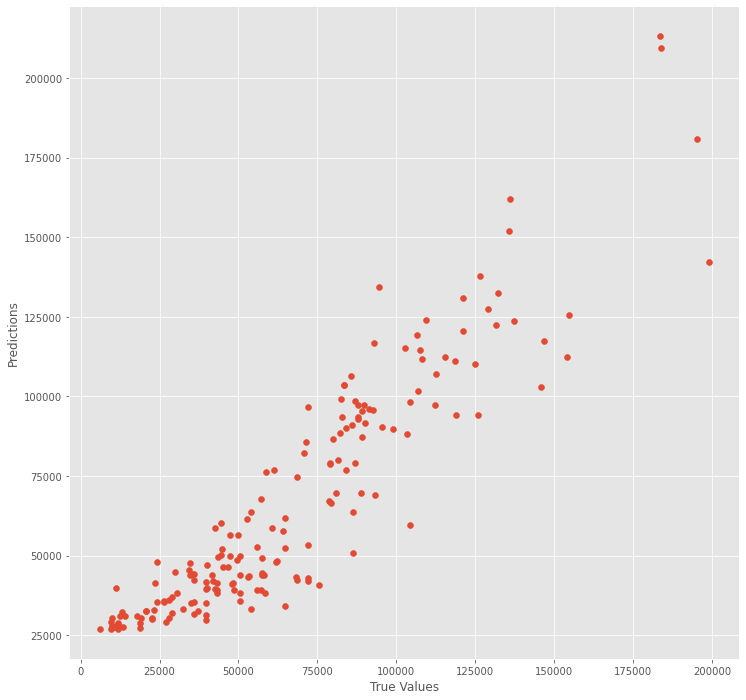

In [46]:
# Linear Regression 분석
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
plt.figure(figsize=(12,12))
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
print(model.score(X_test, y_test))

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-package

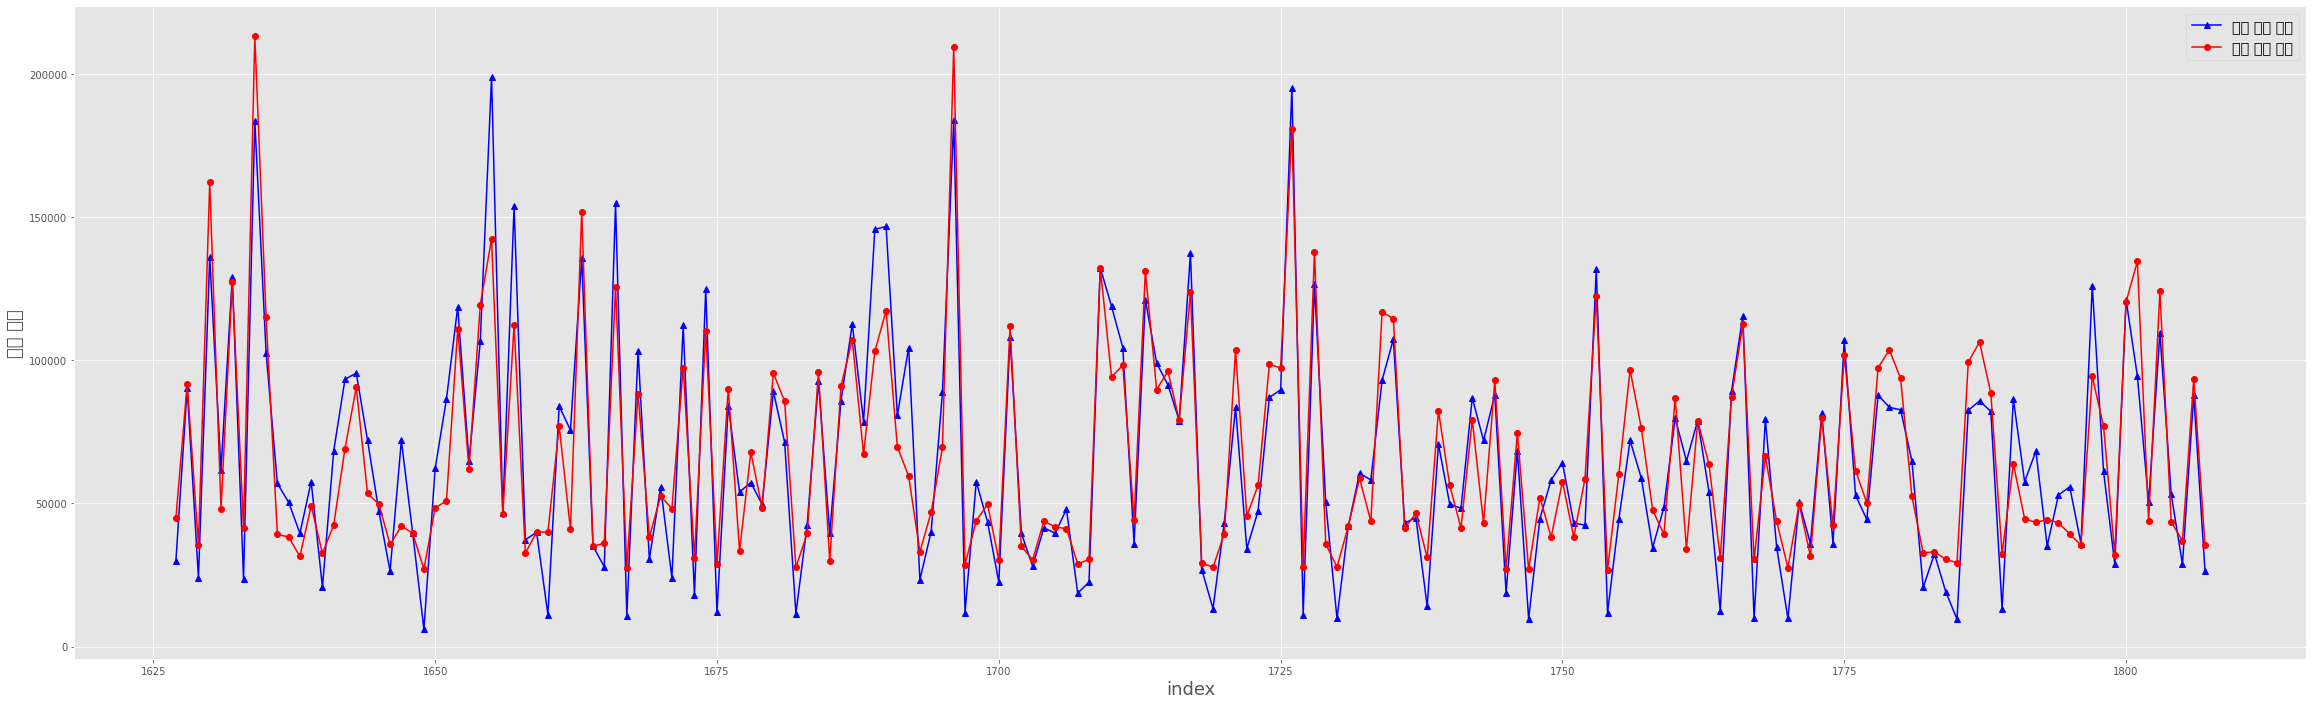

In [47]:
list = []
for i in range(len(y_train), len(y_train)+len(y_test)):
    list.append(i)

plt.figure(figsize=(40,12))
plt.xlabel('index', fontsize=18)
plt.ylabel('소요 시간', fontsize=18)
plt.plot(list, y_test, color='blue', marker='^', label='실제 소요 시간')
plt.plot(list, predictions, color='red', marker='o', label='예상 소요 시간')
plt.legend(fontsize='x-large')
plt.show()

In [48]:
# Ridge_Lasso 회귀

# model_ridge_alpha_10
model_ridge_alpha_10 = Ridge(alpha=100).fit(X_train, y_train)

print("훈련 세트 점수: {:f}".format(model_ridge_alpha_10.score(X_train, y_train)))
print("테스트 세트 점수: {:f}".format(model_ridge_alpha_10.score(X_test, y_test)))

훈련 세트 점수: 0.829593
테스트 세트 점수: 0.845134


A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50836 missing fr

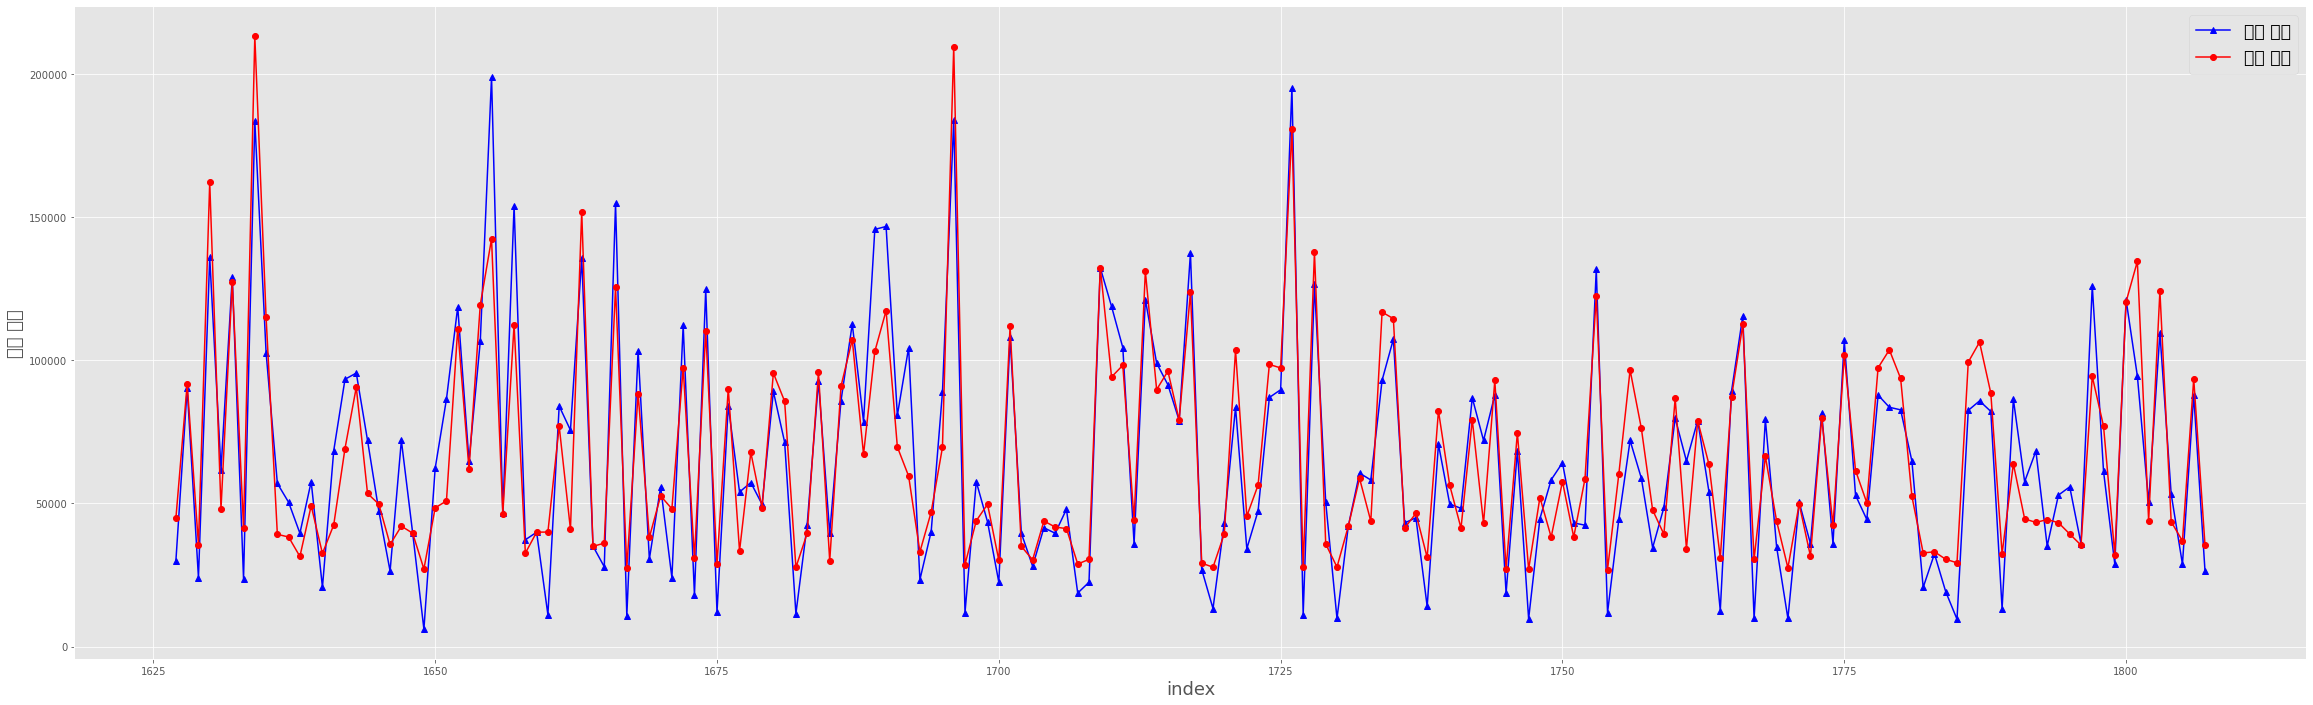

In [49]:
predictions = model_ridge_alpha_10.predict(X_test)
list = []
for i in range(len(y_train), len(y_train)+len(y_test)):
    list.append(i)

plt.figure(figsize=(40,12))
plt.xlabel('index', fontsize=18)
plt.ylabel('소요 시간', fontsize=18)
plt.plot(list, y_test, color='blue', marker='^', label='소요 시간')
plt.plot(list, predictions, color='red', marker='o', label='소요 시간')
plt.legend(fontsize='xx-large')
plt.show()

In [50]:
# Lasso_regression
model_lasso001 = Lasso(alpha=0.01, max_iter=1000).fit(X_train, y_train)

print("훈련 세트 점수: {:f}".format(model_lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:f}".format(model_lasso001.score(X_test, y_test)))

훈련 세트 점수: 0.829593
테스트 세트 점수: 0.845134


A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-

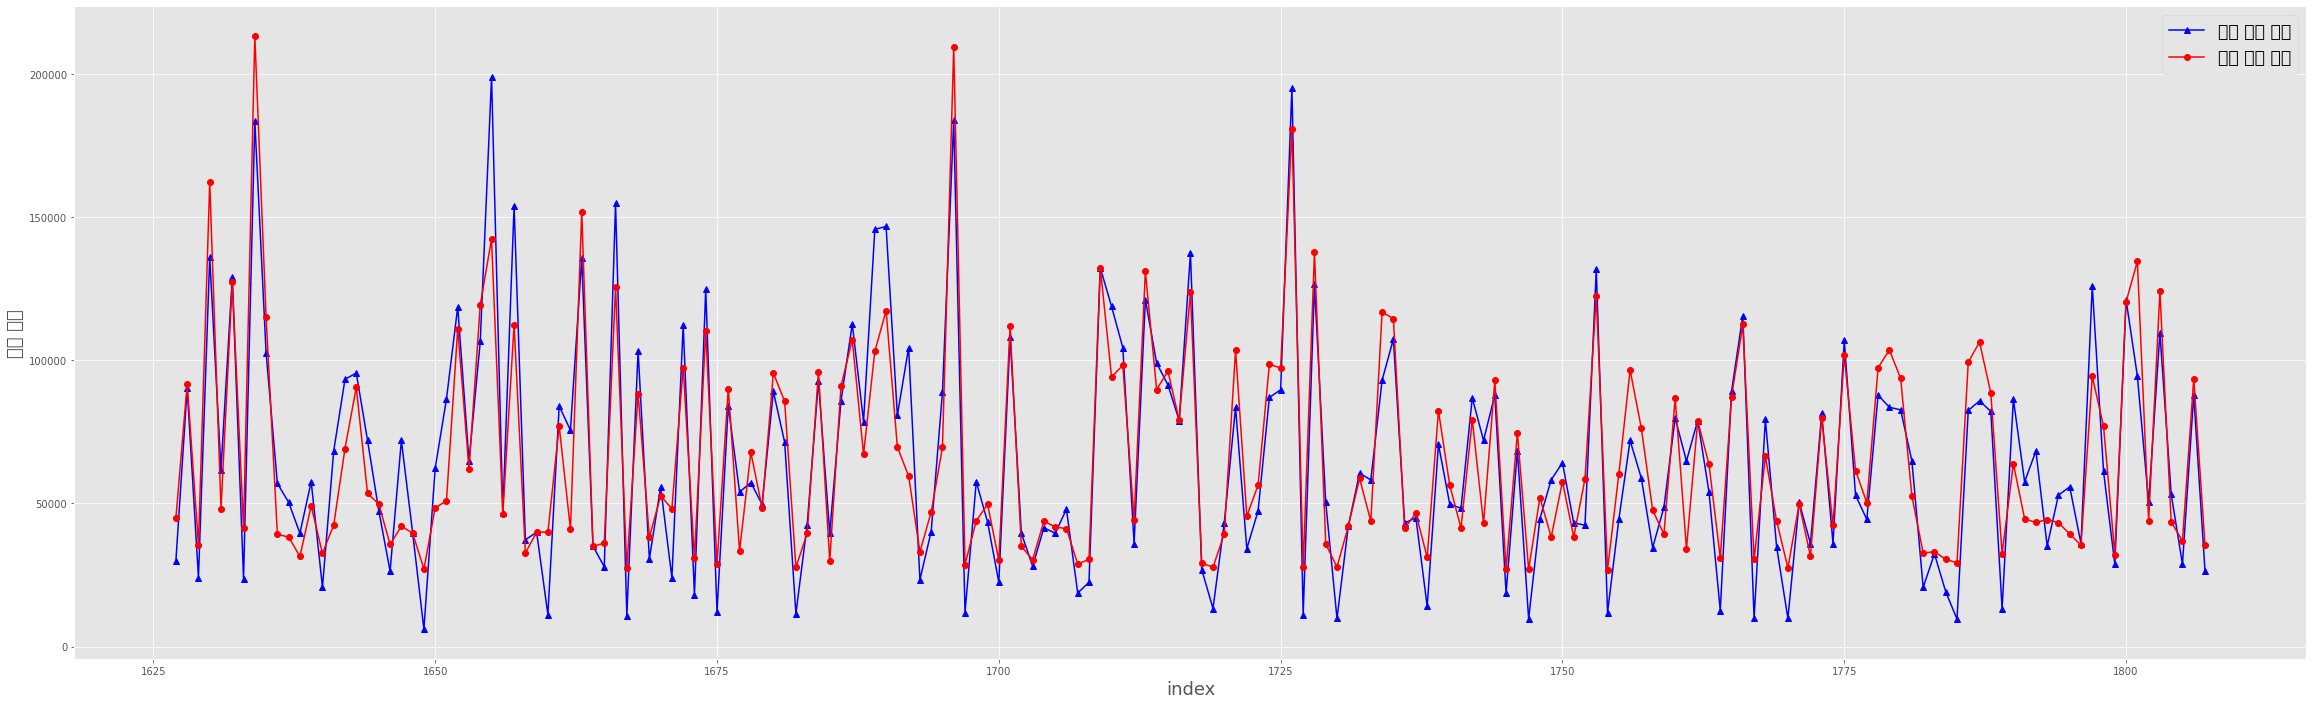

In [51]:
predictions = model_lasso001.predict(X_test)
list = []
for i in range(len(y_train), len(y_train)+len(y_test)):
    list.append(i)

plt.figure(figsize=(40,12))
plt.xlabel('index', fontsize=18)
plt.ylabel('소요 시간', fontsize=18)
plt.plot(list, y_test, color='blue', marker='^', label='실제 소요 시간')
plt.plot(list, predictions, color='red', marker='o', label='예상 소요 시간')
plt.legend(fontsize='xx-large')
plt.show()

In [52]:
# Gradient_Boosting
from sklearn.ensemble import GradientBoostingRegressor

model_gradient = GradientBoostingRegressor(n_estimators=2000)
model_gradient.fit(X_train, y_train)

# 훈련과 테스트 스코어 비교
print("훈련 세트 점수: {:f}".format(model_gradient.score(X_train, y_train)))
print("테스트 세트 점수: {:f}".format(model_gradient.score(X_test, y_test)))

훈련 세트 점수: 0.986758
테스트 세트 점수: 0.829099


A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-

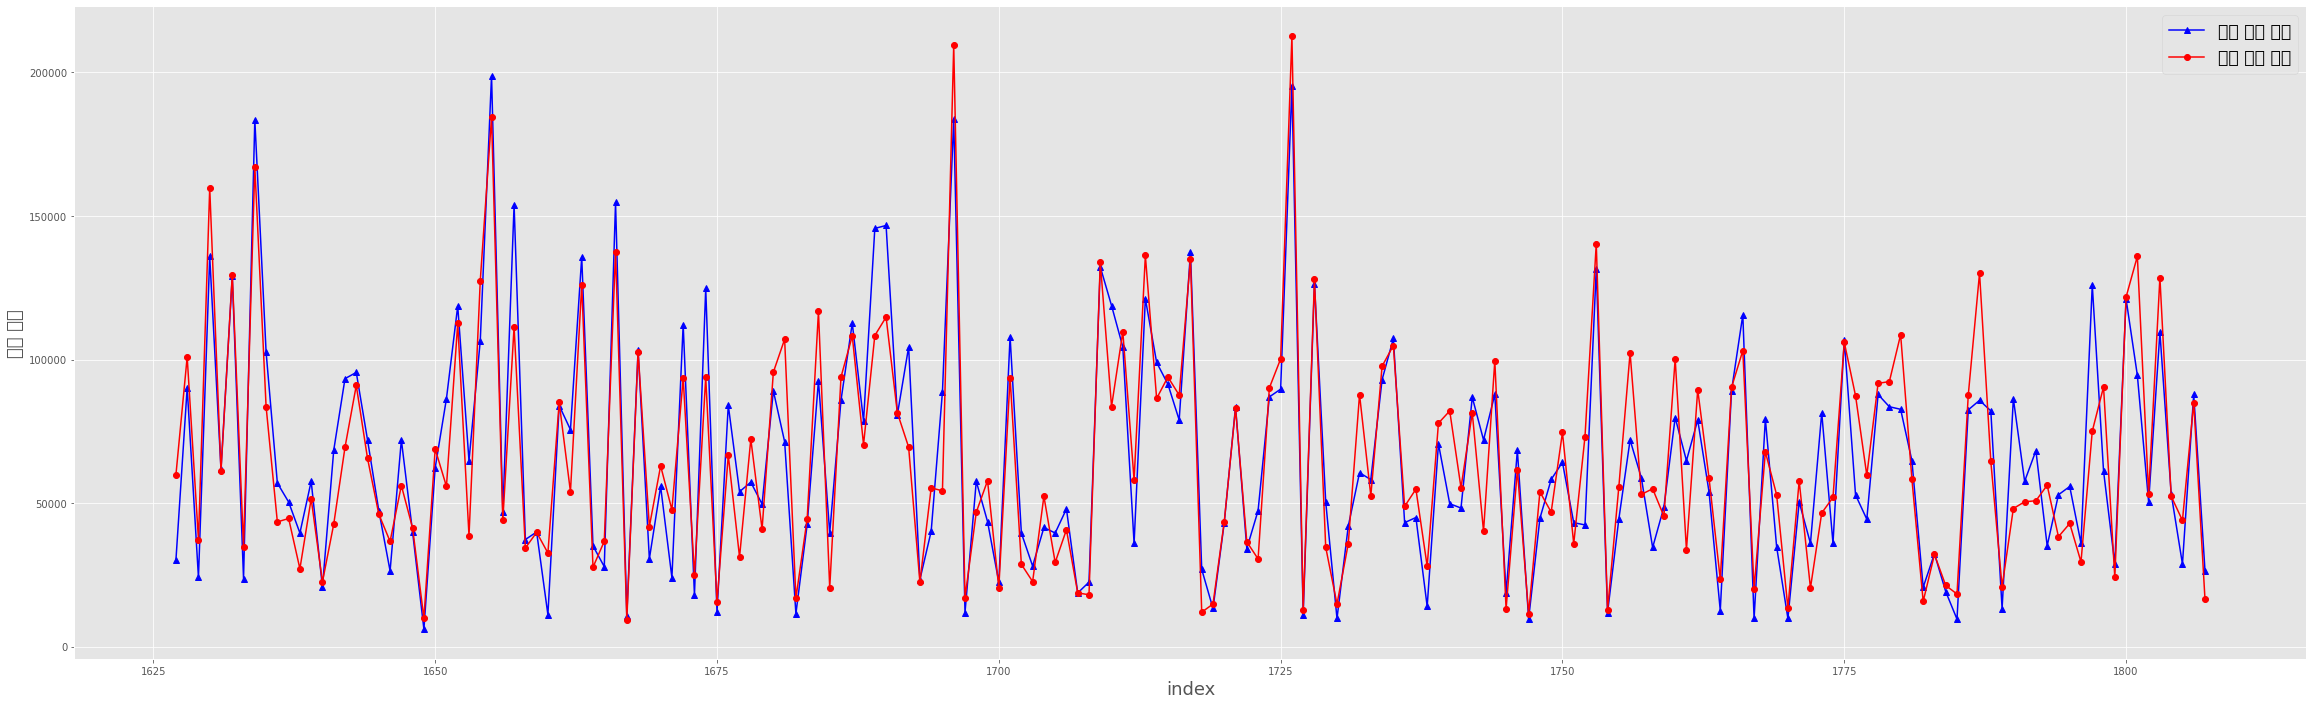

In [53]:
predictions = model_gradient.predict(X_test)
list = []
for i in range(len(y_train), len(y_train)+len(y_test)):
    list.append(i)

plt.figure(figsize=(40,12))
plt.xlabel('index', fontsize=18)
plt.ylabel('소요 시간', fontsize=18)
plt.plot(list, y_test, color='blue', marker='^', label='실제 소요 시간')
plt.plot(list, predictions, color='red', marker='o', label='예상 소요 시간')
plt.legend(fontsize='xx-large')
plt.show()

In [54]:
# SVM
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
SupportVectorRegModel = make_pipeline(StandardScaler(), SVR(C=10000.0, epsilon=0.2))
SupportVectorRegModel.fit(X_train, y_train)

# 훈련과 테스트 스코어 비교
print("훈련 세트 점수: {:f}".format(SupportVectorRegModel.score(X_train, y_train)))
print("테스트 세트 점수: {:f}".format(SupportVectorRegModel.score(X_test, y_test)))


훈련 세트 점수: 0.843782
테스트 세트 점수: 0.849685


A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-

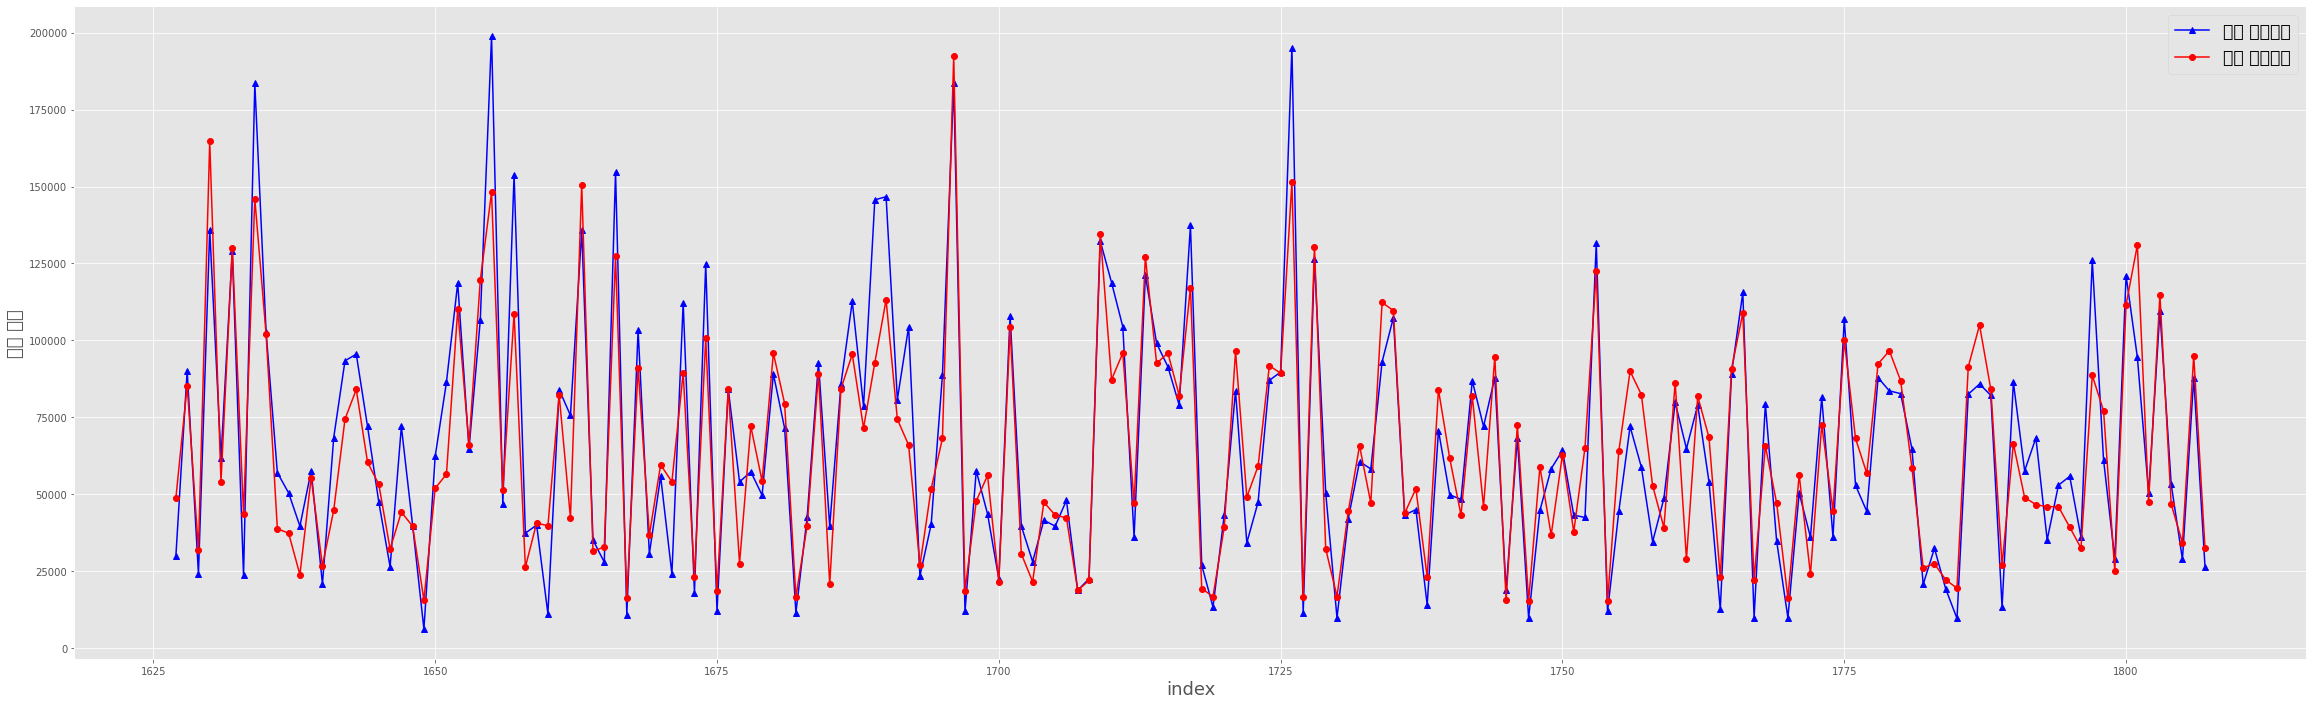

In [55]:
predictions = SupportVectorRegModel.predict(X_test)
list = []
for i in range(len(y_train), len(y_train)+len(y_test)):
    list.append(i)

plt.figure(figsize=(40,12))
plt.xlabel('index', fontsize=18)
plt.ylabel('소요 시간', fontsize=18)
plt.plot(list, y_test, color='blue', marker='^', label='실제 소요시간')
plt.plot(list, predictions, color='red', marker='o', label='예상 소요시간')
plt.legend(fontsize='xx-large')
plt.show()

In [56]:
# Random_Forest
from sklearn.ensemble import RandomForestRegressor

model_randomForest = RandomForestRegressor(n_estimators=1000)
model_randomForest.fit(X_train, y_train)

# 훈련과 테스트 스코어 비교
print("훈련 세트 점수: {:f}".format(model_randomForest.score(X_train, y_train)))
print("테스트 세트 점수: {:f}".format(model_randomForest.score(X_test, y_test)))

훈련 세트 점수: 0.978189
테스트 세트 점수: 0.868926


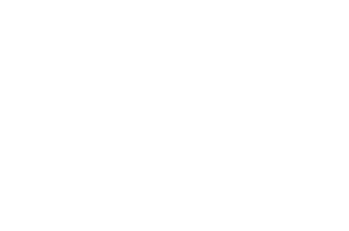

A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51089 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
A:\anaconda3\lib\site-

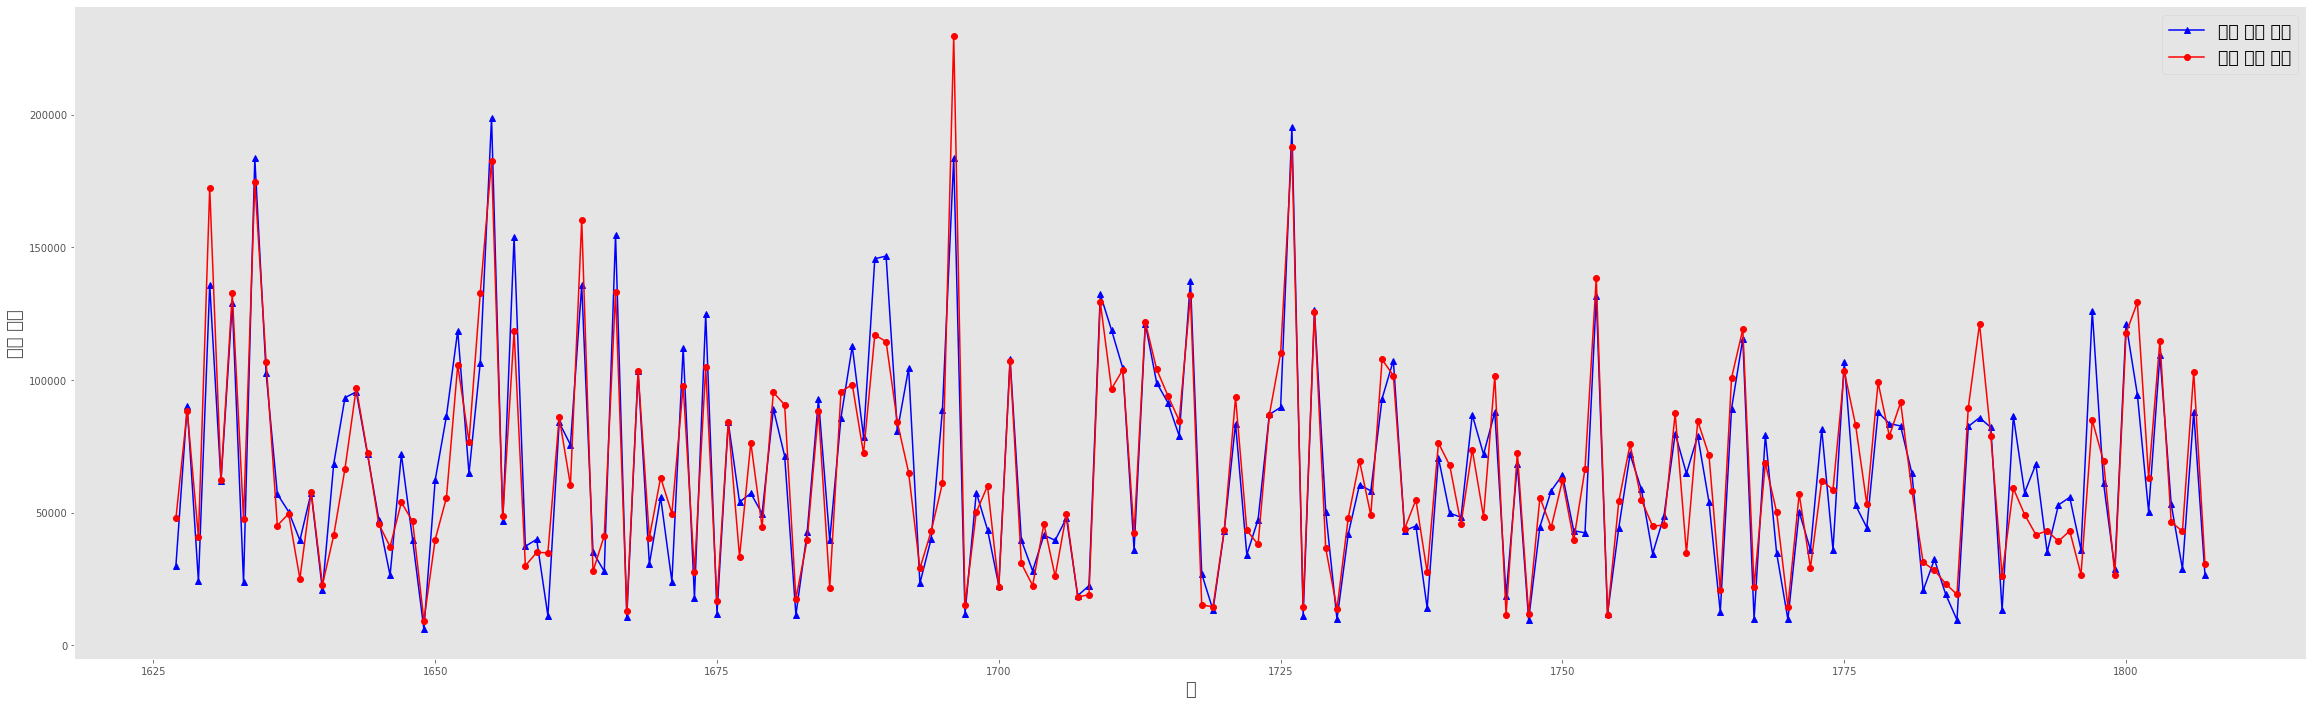

In [57]:
predictions = model_randomForest.predict(X_test)
list = []
for i in range(len(y_train), len(y_train)+len(y_test)):
    list.append(i)
plt.axis("off")
plt.figure(figsize=(40,12))
plt.grid(False)
plt.xlabel('작', fontsize=18)
plt.ylabel('소요 시간', fontsize=18)
plt.plot(list, y_test, color='blue', marker='^', label='실제 소요 시간')
plt.plot(list, predictions, color='red', marker='o', label='예상 소요 시간')
plt.legend(fontsize='xx-large')
plt.show()

In [6]:
data = pd.read_csv("example.csv")
data

,Unnamed: 0,ab,B,C
0,0,1,2,3
1,1,2,3,2
2,2,3,3,3
3,3,4,4,4
4,4,5,5,4


In [24]:
sql = "(data['ab'] == 1)  |  (data['B'] == 1)  |  (data['C'] == 1) "

In [25]:
data[eval(sql)]

,Unnamed: 0,ab,B,C
0,0,1,2,3


In [29]:
list(data["ab"])

[1, 2, 3, 4, 5]

In [34]:
list(data.columns[0:2])

['Unnamed: 0', 'ab']